In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
%matplotlib inline


## 1.1 Mathematical Derivation


We will assume that our goal is to find a unit vector such that it $\textbf{minimize projection residuals} $ given that mean of all data $\mathbf x_{i}$ is zero. In another word, we want to find a $\mathbf w$ such that

\begin{align*}
	\mathbf w &= arg\min_{\mathbf w} MSE(\mathbf w)= arg\min_{\mathbf w}\frac{1}{n} \sum_{i=1}^{N} \Big\| \,\,\mathbf x_{i} - (\mathbf w\cdot \mathbf x_{i})\mathbf w	\,\,	\Big\|^{2} &&\text{Given that }\|\mathbf w\| = 1
\end{align*}

Notice that we can simplify $MSE$ as follows:

\begin{align*}
	MSE(\mathbf w) &= \frac{1}{n}\sum_{i=1}^{N} \Big( \mathbf x_{i} - (\mathbf w\cdot \mathbf x_{i})\mathbf w \Big) \cdot \Big( \mathbf x_{i} - (\mathbf w\cdot \mathbf x_{i})\mathbf w \Big) \\
	&= \frac{1}{n} \sum_{i=1}^{N} \Big[\mathbf x_{i} \cdot \mathbf x_{i} - 2(\mathbf w\cdot \mathbf x_{i})^{2} + (\mathbf w\cdot \mathbf x_{i})^{2} \mathbf w\cdot \mathbf w\Big]\\
	&= \frac{1}{n} \sum_{i=1}^{N} \Big[\|\mathbf x_{i}\|^{2} - 2(\mathbf w\cdot \mathbf x_{i})^{2} + (\mathbf w\cdot \mathbf x_{i})^{2} \Big] &&\text{Since $\mathbf w\cdot \mathbf w=\|\mathbf w\|^{2}=1$}\\
	&= \frac{1}{n} \sum_{i=1}^{N} \|\mathbf x_{i}\|^{2} - (\mathbf w\cdot \mathbf x_{i})^{2} \\
	&= \frac{1}{n} \sum_{i=1}^{N} \|\mathbf x_{i}\|^{2} - \frac{1}{n} \sum_{i=1}^{N} (\mathbf w\cdot \mathbf x_{i})^{2} 
\end{align*}

Notice that the first summation doesn't depend on $\mathbf w$ so we can ignore it and our goal becomes

\begin{align*}
	\mathbf w &= arg\min_{\mathbf w} MSE(\mathbf w) = arg\max_{\mathbf w}\frac{1}{n}\sum_{i=1}^{N} (\mathbf w\cdot \mathbf x _{i})^{2}\\
	% &= arg\max_{\mathbf w} \left (\frac{1}{n}\sum_{i=1}^{N} \mathbf x_{i}\cdot \mathbf w\right )^{2} + Var[\mathbf w\cdot \mathbf x_{i}] = Var[\mathbf w\cdot \mathbf x_{i}] &&\text{Since $\sum_{i=1}^{N}\mathbf x_{i}=\mathbf 0$.}
	&= arg\max_{\mathbf w} \frac{1}{n} (\mathbf X\mathbf w)^{T} (\mathbf X\mathbf w) &&\text{Define $X = \begin{bmatrix}  
		\mathbf x_{1}&\cdots &\mathbf x_{N}
	\end{bmatrix}$}\\
	&= arg\max_{\mathbf w} \frac{1}{n}\mathbf w^{T}\mathbf X^{T}\mathbf X \mathbf w = arg\max_{\mathbf w} \mathbf w^{T}\frac{\mathbf X^{T}\mathbf X}{n} \mathbf w \\
	&= arg\max_{\mathbf w} \mathbf w \mathbf V\mathbf w &&\text{Where $\mathbf V$ is covariance matrix}
\end{align*}

Now, since we have the constraint $\|\mathbf w\|=1$, we need to add the $\textbf{Lagrange Multiplier}$ $\lambda$ in order to maximize $\mathbf w\mathbf V\mathbf w$.Thus, define

\begin{align*}
	\mathcal L(\mathbf w, \lambda) &\equiv \mathbf w^{T} \mathbf V \mathbf w - \lambda (\mathbf w^{T}\mathbf w-1)\\
	\frac{\partial \mathcal L}{\partial \lambda} &= \mathbf w^{T}\mathbf w - 1\\
	\frac{\partial \mathcal L}{\partial \mathbf w} &= 2\mathbf V\mathbf w - 2\lambda \mathbf w
\end{align*}

Setting the derivatives to zero gives us

\begin{align*}
	\mathbf w^{T}\mathbf w = 1\\
	\mathbf V\mathbf w = \lambda \mathbf w
\end{align*}

Thus, the desired vector $\mathbf w$ should be an eigenvector of the covariance matrix $\mathbf V$ and since we want to maximize $\mathbf w \mathbf V\mathbf w = \mathbf w \lambda \mathbf w = \lambda$, we can say the maximized vector should be associated with the largest eigenvalue.


## 1.2 PCA Implementation

In [2]:
class PCA:
    def __init__(self, k):
        self.k = k
        self.components = None
        self.mean = None
        
    def fit(self, X):
        '''
            X is the input data of size N x M
        '''
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        V = X.T@X # V is of size M x M
        eigenvalues, eigenvectors = np.linalg.eig(V)
        # eigenvectors have column vector
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[idxs][:self.k]
        
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)        

## 1.3 Test with Iris Dataset

### 1.3.1 Read in data

In [3]:
import csv

y = []
x = []

def mapping(name):
    '''
    Mapping the species of iris to category
    '''
    M = {"Setosa":0, "Versicolor":1, "Virginica":2}
    if name in M:
        return M[name]
    else:
        print("Name not found")
        
with open('iris.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    count = 0
    for row in csv_reader:
        if count:
            x.append(np.array(row[:-1]).astype(np.float))
            y.append(mapping(row[-1]))
        else:
            print("Header:", row)
        count += 1
    print(f'Processed {count} lines.')
    
x, y = np.array(x), np.array(y)

Header: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
Processed 151 lines.


In [4]:
# Categorical Dictonary
d = {0: [], 1: [], 2:[]}
for features, category in zip(x, y):
    d[category].append(features)
for i in range(3):
    d[i] = np.array(d[i])

### 1.3.2 Data Visualization

/Users/caoshuheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


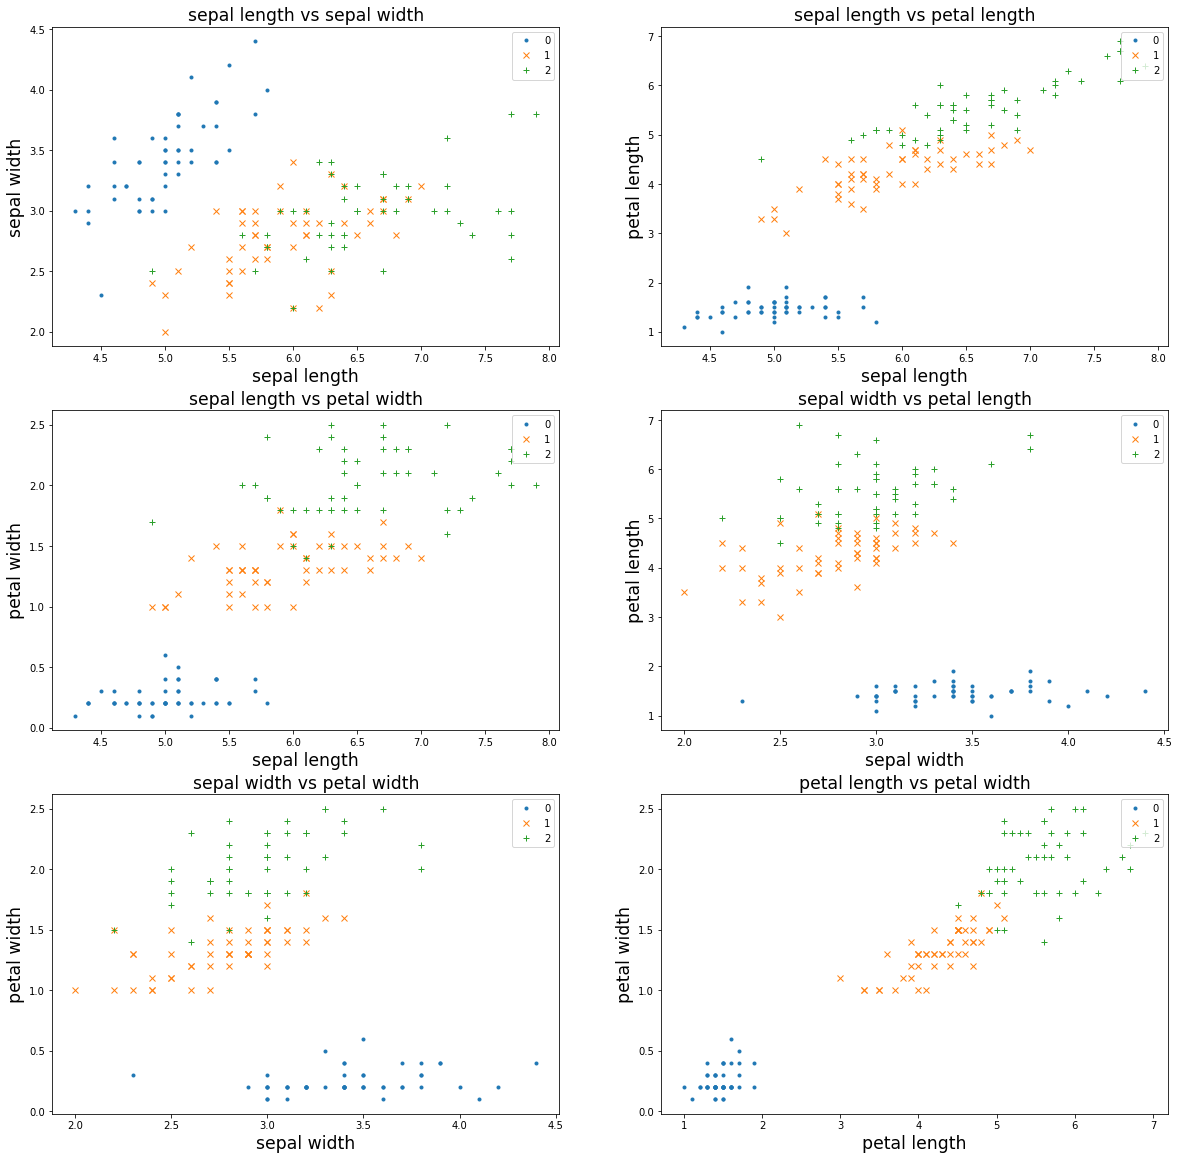

In [5]:
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']

plt.figure(figsize=(20, 20))
count = 0
for i in range(4):
    for j in range(i+1, 4):
        count += 1;
        for category, features_list, marker in zip(d.keys(), d.values(), ['.', 'x', '+']):
            plt.subplot(3, 2, count);
            plt.plot(features_list.transpose()[i], features_list.transpose()[j], 
                     marker, label=category)
        plt.legend(('0', '1', '2'), loc='upper right')
        plt.xlabel(feature_names[i], fontsize = 'xx-large')
        plt.ylabel(feature_names[j], fontsize = 'xx-large')
        plt.title(f"{feature_names[i]} vs {feature_names[j]}", fontsize = 'xx-large')

### 1.3.3 Fit data

In [6]:
pca = PCA(2)
pca.fit(x)
x_projected = pca.transform(x)

In [7]:
print(f"Shape of original data: {x.shape} and shape of projected data: {x_projected.shape}")

Shape of original data: (150, 4) and shape of projected data: (150, 2)


Text(0.5, 1.0, 'PCA Results')

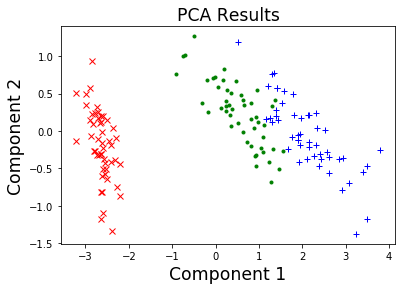

In [9]:
markers = ['x', '.', '+']
colors = ['r', 'g', 'b']
for i, j in zip(x_projected, y):
    marker = markers[j]
    color = colors[j]
    plt.plot(i[0], i[1], marker=marker, color=color)

plt.xlabel("Component 1", fontsize = 'xx-large')
plt.ylabel("Component 2", fontsize = 'xx-large')
plt.title(f"PCA Results", fontsize = 'xx-large')